In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import re

In [2]:
def convert_duration_to_seconds(duration):
    pattern = r'PT(\d+H)?(\d+M)?(\d+S)?'
    hours, minutes, seconds = re.match(pattern, duration).groups()
    
    total_seconds = 0
    if hours:
        total_seconds += int(hours[:-1]) * 3600
    if minutes:
        total_seconds += int(minutes[:-1]) * 60
    if seconds:
        total_seconds += int(seconds[:-1])
    
    return total_seconds

In [3]:
train_df = pd.read_csv("../data/dataset/train/train.csv")
validate_df = pd.read_csv("../data/dataset/validation/validation.csv")

In [4]:
train_audio_df = pd.read_csv("../data/dataset/train/train_audio_clean.csv")
validate_audio_df = pd.read_csv("../data/dataset/validation/validation_audio_clean.csv")
train_audio2_df = pd.read_csv("../data/dataset/train/train_audio2.csv")
train_audio2_2_df = pd.read_csv("../data/dataset/train/train_audio2_2.csv")
validate_audio2_df = pd.read_csv("../data/dataset/validation/validation_audio2.csv")
validate_audio2_2_df = pd.read_csv("../data/dataset/validation/validation_audio2_2.csv")
train_visual_df = pd.read_csv("../data/dataset/train/train_visual.csv")
validate_visual_df = pd.read_csv("../data/dataset/validation/validation_visual.csv")
train_word_count_df = pd.read_csv("../data/dataset/train/train_word_count.csv")
validate_word_count_df = pd.read_csv("../data/dataset/validation/validation_word_count.csv")
train_control_count_df = pd.read_csv("../data/dataset/train/train_control_count.csv")
validate_control_count_df = pd.read_csv("../data/dataset/validation/validation_control_count.csv")

In [5]:
# Merging in audio and visual data
train_df = train_df.merge(train_visual_df, on='id')
train_df = train_df.merge(train_audio_df, on='id')
train_df = train_df.merge(train_audio2_2_df, on='id')
train_df = train_df.merge(train_word_count_df, on='id')
train_df = train_df.merge(train_control_count_df, on='id')
validate_df = validate_df.merge(validate_visual_df, on='id')
validate_df = validate_df.merge(validate_audio_df, on='id')
validate_df = validate_df.merge(validate_audio2_2_df, on='id')
validate_df = validate_df.merge(validate_word_count_df, on='id')
validate_df = validate_df.merge(validate_control_count_df, on='id')

In [12]:
# duration_train = train_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)
X_train = train_df[['controlCount']]
# X_train['duration'] = duration_train

# y_train = train_df['likes_per_view']
y_train = train_df['views_per_week']

In [13]:
# duration_validation = validate_df['duration'].apply(convert_duration_to_seconds).values.reshape(-1, 1)
X_validate = validate_df[['controlCount']]
# X_validate['duration'] = duration_validation

In [14]:
reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [15]:
predictions = reg_tree.predict(X_validate)
print(predictions)

[284.20007694 284.20007694 284.20007694 284.20007694 252.74170938
 284.20007694 284.20007694 252.74170938 284.20007694 284.20007694
 284.20007694 284.20007694 284.20007694 252.74170938 284.20007694
 284.20007694 284.20007694 355.7037218  284.20007694 193.34963253
 284.20007694 284.20007694 284.20007694 284.20007694 252.74170938
 284.20007694 284.20007694 284.20007694 284.20007694 284.20007694
 284.20007694 193.34963253 193.34963253 193.34963253 284.20007694
 284.20007694 284.20007694 284.20007694 193.34963253 284.20007694
 284.20007694 284.20007694 284.20007694]


In [10]:
reg_tree_df = pd.DataFrame(columns=['id', 'likes_per_view_predicted', 'likes_per_view_actual'])
reg_tree_df['id'] = validate_df['id']
reg_tree_df['likes_per_view_predicted'] = predictions
reg_tree_df['likes_per_view_actual'] = validate_df['likes_per_view']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/8.csv", header=True, index=False)

In [16]:
# MESSED UP HERE! NEED TO FIX 1.csv ACCIDENTALLY OVERWRITTEN
reg_tree_df['views_per_week_predicted'] = predictions
reg_tree_df['views_per_week_actual'] = validate_df['views_per_week']
reg_tree_df.to_csv("../data/dataset/models/reg_tree/8.csv", header=True, index=False)

In [18]:
# Likes
actual_outputs = reg_tree_df['likes_per_view_actual']*100
predicted_outputs = reg_tree_df['likes_per_view_predicted']*100

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for LPV:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for LPV:", rmse)

# Views
actual_outputs = reg_tree_df['views_per_week_actual']
predicted_outputs = reg_tree_df['views_per_week_predicted']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_outputs, predicted_outputs)
print("Mean Absolute Error for VPW:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_outputs, predicted_outputs, squared=False)
print("Root Mean Squared Error for VPW:", rmse)

Mean Absolute Error for LPV: 0.6554010815787594
Root Mean Squared Error for LPV: 0.7468920819492837
Mean Absolute Error for VPW: 201.95088035407542
Root Mean Squared Error for VPW: 370.56427350973917


[]

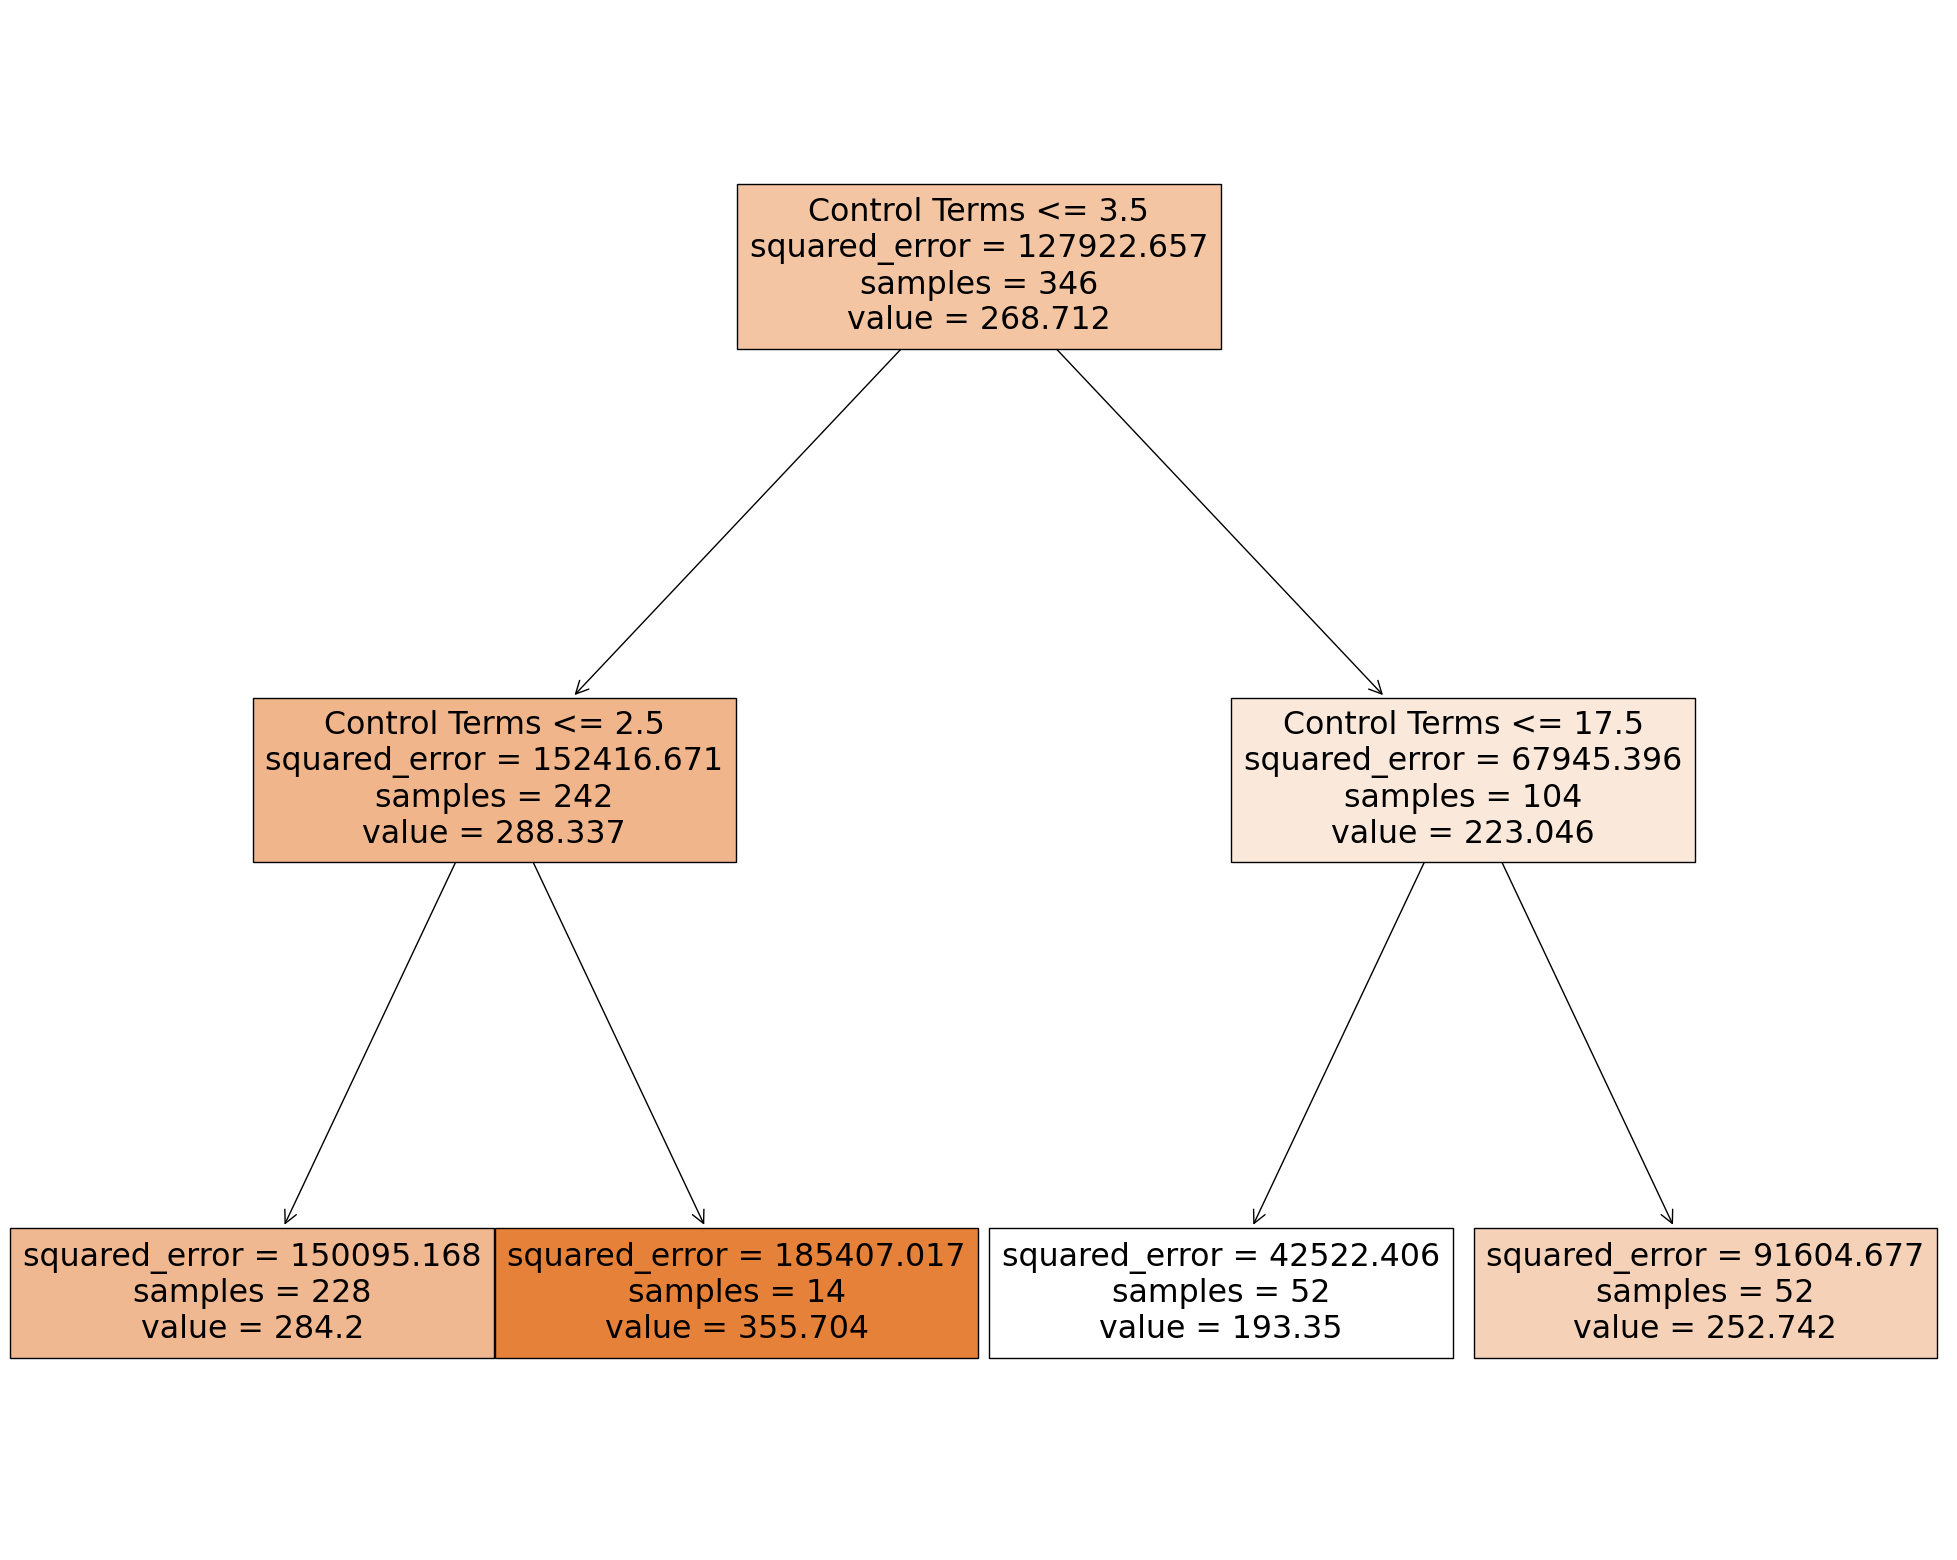

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg_tree, 
                   filled=True, feature_names=['Control Terms'])
plt.plot()